# **Importing Libraries**


In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import nltk
import wordcloud

from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

from nltk.tokenize import word_tokenize
import re,string,unicodedata

from prettytable import PrettyTable
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score, roc_auc_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import re
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admins\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# **DATA PREPROCESSING**


## **Loading data**


In [56]:
df = pd.read_csv('IMDB-Dataset.csv')

In [57]:
df.head(10)

,Ratings,Reviews,Movies
0,1,"*Disclaimer: I only watched this movie as a conditional agreement. And I see films for free. I wouldn't be caught dead giving my hard earned money to these idiots.Well, to explain the depth of this 'film', I could write my shortest review, ever. Don't see this movie. It is by far the stupidest, lamest, most lazy, and unbelievably UNFUNNY movie I have ever seen. It is a total disaster. But since my hatred for this movie, and the others like it, extends far beyond one viewing, I think I'll go on for a bit.I don't know any of the people in the movie besides Carmen Electra, Vanessa Minnillo, and Kim Kardashian, but it doesn't matter. They're all horrible, though I think that was the point. The editing is flat out horrible, and possibly blatant continuity errors make this crapfast even crappier than I thought it would be. Now I know that these films are not supposed to be serious at all, but come on, it's film-making 101 that if someone gets a minor facial cut, it should be there in the...",Disaster Movie
1,1,"I am writing this in hopes that this gets put over the previous review of this ""film"". How anyone can find this slop entertaining is completely beyond me. First of all a spoof film entitled ""Disaster Movie"", should indeed be a spoof on disaster films. Now I have seen 1 (yes count them, 1) disaster film being spoofed, that being ""Twister"". How does Juno, Iron Man, Batman, The Hulk, Alvin and the Chipmunks, Amy Winehouse, or Hancock register as Disaster films? Selzterwater and Failburg once again have shown that they lack any sort of writing skill and humor. Having unfortunately been tortured with Date Movie and Epic Movie I know exactly what to expect from these two...no plot, no jokes just bad references and cheaply remade scenes from other films. Someone should have informed them that satire is more than just copy and paste from one film to another, though I shouldn't say that because some of these actually just seem to be taken from trailers.There is nothing clever or witty or re...",Disaster Movie
2,1,"Really, I could write a scathing review of this turd sandwich, but instead, I'm just going to be making a few observations and points I've deduced.There's just no point in watching these movies anymore. Does any reader out there remember Scary Movie? Remember how it was original with a few comedic elements to it? There was slapstick, some funny lines, it was a pretty forgettable comedy, but it was worth the price of admission. Well, That was the last time this premise was funny. STOP MAKING THESE MOVIES. PLEASE.I could call for a boycott of these pieces of monkey sh*t, but we all know there's going to be a line up of pre pubescent annoying little buggers, spouting crappy one liners like, ""THIS IS SPARTA!"" and, ""IM RICK JAMES BITCH"" so these movies will continue to make some form of monetary gain, considering the production value of this movie looks like it cost about 10 cents to make.Don't see this movie. Don't spend any money on it. Go home, rent Airplane, laugh your ass off, and ...",Disaster Movie
3,1,"If you saw the other previous spoof movies by these two horrible gentlemen, then you should know that this already will be bad. I'll tell you the truth, if you want to watch it as a brainless person (ironically meant for the stereotypical teenagers, which I am not) then you will laugh at it a bit. But if you judge it, even a little, the movie automatically fails. Why? Never ask that when it comes to these two men.Remember the good old Hollywood days whenever making a movie was about showing people a type of art, and also a story that kept you on the edge of your seat? Well whenever word hit that making films earned you loads of cash, then all these greedy people came in the picture and its quite pathetic. These two are no exception. We still have movie artists (most notably the genius that is Christopher Nolan). But these two guys just...well I've been writing so big words, let me put 

## **Removing stop words**


In [58]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
other_stopwords = ["would","shall","could","might"]
stop_words.extend(other_stopwords)
stop_words.remove("not")
stop_words=set(stop_words)
print(stop_words)

{'our', 'wouldn', 'down', 'its', 'am', 'ma', 'did', 'or', 'hers', 'when', 'mightn', 'being', 'what', 'shall', 'be', 'own', 'just', 'off', 'about', 'to', 'if', 'any', 'this', 'should', 'because', 'your', 'couldn', 'through', 'few', 'from', 's', 'o', 'themselves', 'didn', "couldn't", "wasn't", 'below', 'as', 'in', 'of', 'by', 'he', 'once', 'until', 'has', 'do', 'theirs', 'against', 'same', 'can', 'mustn', 'why', 'would', 'it', 'with', 'for', 'whom', 'she', 'herself', 'is', 'up', 'ourselves', 't', 'me', 'out', 'could', 'them', 'under', 'doesn', 'aren', 'you', "don't", "hadn't", 'had', "you're", 'his', 'no', 'where', 'won', 'we', 'himself', 'now', 'very', "won't", 'hasn', 'ain', 'the', 'was', 'yours', 'wasn', 'before', 'nor', 'than', 'd', 'haven', 'but', 'an', 'a', 'don', 'having', 'doing', 'further', 'are', "weren't", 'after', 'each', 'at', 'will', 'shan', "shan't", 'shouldn', 'weren', "she's", "it's", 'who', "doesn't", 'i', 'some', 'other', 'him', "that'll", 'they', 'again', 'does', 'abo

## **Removing special character**


In [59]:
def remove_special_character(review):
    return re.sub(r'[^\w\s]', '', review)

In [60]:
def remove_url(review):
    return re.sub(r'http\S+', '', review)

In [61]:
def remove_stopwords(review):
    clean_data = []
    for word in review.split():
        word_cleaned = word.strip().lower()
        if word_cleaned not in stop_words and word_cleaned.isalpha():
            clean_data.append(word_cleaned)
    return " ".join(clean_data)

## **Expansion of English contractions**


In [62]:
def contraction_expansion(review):
    contraction_dict = {
        "won't": "would not",
        "can't": "can not",
        "don't": "do not",
        "shouldn't": "should not",
        "needn't": "need not",
        "hasn't": "has not",
        "haven't": "have not",
        "weren't": "were not",
        "mightn't": "might not",
        "didn't": "did not",
        "n't": " not",
        "'re": " are",
        "'s": " is",
        "'d": " would",
        "'ll": " will",
        "'ve": " have",
        "'m": " am"
    }
    for contraction, expansion in contraction_dict.items():
        review = re.sub(r"\b" + re.escape(contraction) + r"\b", expansion, review)
    return review


In [63]:
def data_cleaning(review):
    review = contraction_expansion(review)
    review = remove_special_character(review)
    review = remove_url(review)
    review = remove_stopwords(review)    
    return review

## **Adding Reviews_clean column**


In [64]:
pd.options.display.max_colwidth = 1000
df['Reviews_clean']=df['Reviews'].apply(data_cleaning)
df.head(3)

,Ratings,Reviews,Movies,Reviews_clean
0,1,"*Disclaimer: I only watched this movie as a conditional agreement. And I see films for free. I wouldn't be caught dead giving my hard earned money to these idiots.Well, to explain the depth of this 'film', I could write my shortest review, ever. Don't see this movie. It is by far the stupidest, lamest, most lazy, and unbelievably UNFUNNY movie I have ever seen. It is a total disaster. But since my hatred for this movie, and the others like it, extends far beyond one viewing, I think I'll go on for a bit.I don't know any of the people in the movie besides Carmen Electra, Vanessa Minnillo, and Kim Kardashian, but it doesn't matter. They're all horrible, though I think that was the point. The editing is flat out horrible, and possibly blatant continuity errors make this crapfast even crappier than I thought it would be. Now I know that these films are not supposed to be serious at all, but come on, it's film-making 101 that if someone gets a minor facial cut, it should be there in the...",Disaster Movie,disclaimer watched movie conditional agreement see films free wouldnt caught dead giving hard earned money idiotswell explain depth film write shortest review ever dont see movie far stupidest lamest lazy unbelievably unfunny movie ever seen total disaster since hatred movie others like extends far beyond one viewing think go biti not know people movie besides carmen electra vanessa minnillo kim kardashian doesnt matter horrible though think point editing flat horrible possibly blatant continuity errors make crapfast even crappier thought know films not supposed serious come filmmaking someone gets minor facial cut next shot someone gets cut sword blood least cut though since narnia films get away give disaster movie pass herethe jokes thoughtless mindless physical gags obviously take popular movies last year late well including best picture nomineesyou know saddest thing stupid movies not care much money make many cameos sorry ass excuses films taking away jobs actors writers dire...
1,1,"I am writing this in hopes that this gets put over the previous review of this ""film"". How anyone can find this slop entertaining is completely beyond me. First of all a spoof film entitled ""Disaster Movie"", should indeed be a spoof on disaster films. Now I have seen 1 (yes count them, 1) disaster film being spoofed, that being ""Twister"". How does Juno, Iron Man, Batman, The Hulk, Alvin and the Chipmunks, Amy Winehouse, or Hancock register as Disaster films? Selzterwater and Failburg once again have shown that they lack any sort of writing skill and humor. Having unfortunately been tortured with Date Movie and Epic Movie I know exactly what to expect from these two...no plot, no jokes just bad references and cheaply remade scenes from other films. Someone should have informed them that satire is more than just copy and paste from one film to another, though I shouldn't say that because some of these actually just seem to be taken from trailers.There is nothing clever or witty or re...",Disaster Movie,writing hopes gets put previous review film anyone find slop entertaining completely beyond first spoof film entitled disaster movie indeed spoof disaster films seen yes count disaster film spoofed twister juno iron man batman hulk alvin chipmunks amy winehouse hancock register disaster films selzterwater failburg shown lack sort writing skill humor unfortunately tortured date movie epic movie know exactly expect twono plot jokes bad references cheaply remade scenes films someone informed satire copy paste one film another though not say actually seem taken trailersthere nothing clever witty remotely smart way two write not believe people still pay see travesties insult audience though enjoy films doubt smart enough realize thatrating unfortunately not number low enough yes includes negatives rate deserves top worst films time right date movie epic faliurei mean movie meet spartans rather forced hour 

## **Data Overview**


In [65]:
df.isna().sum().to_frame().T

,Ratings,Reviews,Movies,Reviews_clean
0,0,0,25,0


In [66]:
df['Ratings'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Ratings,150000.0,5.5,2.872291,1.0,3.0,5.5,8.0,10.0


In [67]:
df['Reviews_clean'].describe().to_frame().T

,count,unique,top,freq
Reviews_clean,150000,149756,story,10


In [68]:
unique_reviews_count = df['Reviews_clean'].nunique()
unique_movie_names_count = df['Movies'].nunique()
ratings_count = df['Ratings'].count()
print(f'Unique reviews: {unique_reviews_count}')
print(f'Unique movie names: {unique_movie_names_count}')
print(f'Number of ratings: {ratings_count}')

Unique reviews: 149756
Unique movie names: 14205
Number of ratings: 150000


# **EXPLORATORY DATA ANALYSIS**


1     15000
2     15000
4     15000
3     15000
5     15000
6     15000
8     15000
7     15000
10    15000
9     15000
Name: Ratings, dtype: int64


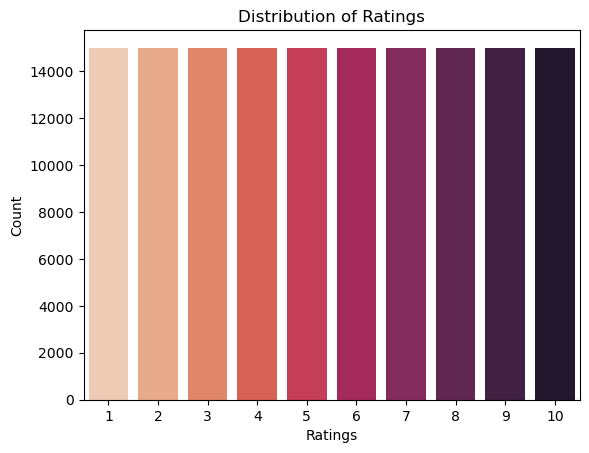

In [69]:
sns.countplot(x=df['Ratings'], palette='rocket_r')
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Count')
print(df['Ratings'].value_counts())
plt.show()

In [70]:
pos = ' '.join(map(str, df['Reviews_clean'][df['Ratings'] >= 7]))
neg = ' '.join(map(str, df['Reviews_clean'][df['Ratings'] <= 4]))
stop_words = set(STOPWORDS)

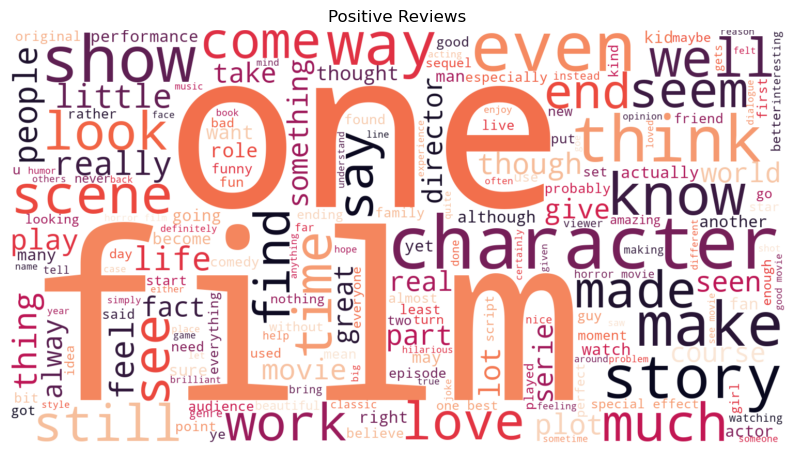

In [71]:
pos_wordcloud = WordCloud(width=1500, height=800, 
                          background_color='white', 
                          stopwords=stop_words, 
                          colormap='rocket_r',
                          min_font_size=15).generate(pos)

plt.figure(figsize=(10, 10))
plt.imshow(pos_wordcloud, interpolation='bilinear')
plt.title('Positive Reviews')
plt.axis('off')
plt.show()

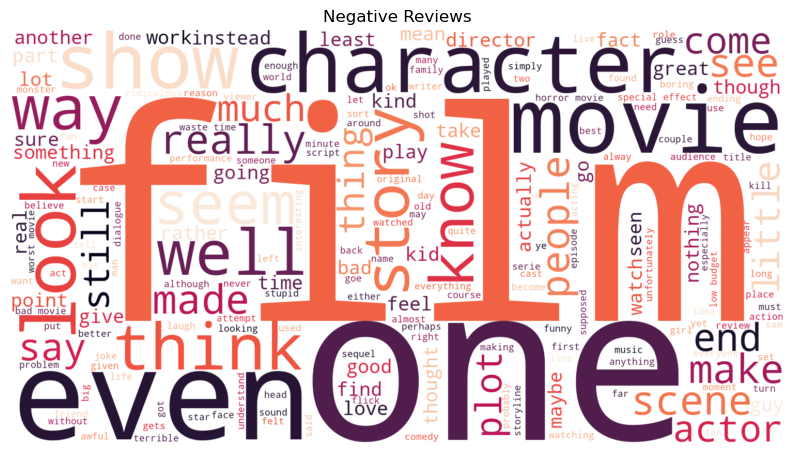

In [72]:
neg_wordcloud = WordCloud(width = 1500, height = 800, 
                background_color ='white', 
                stopwords = stop_words, 
                colormap='rocket_r',
                min_font_size = 15).generate(neg) 

plt.figure(figsize=(10,10))
plt.imshow(neg_wordcloud, interpolation='bilinear')
plt.title('Negative Reviews')
plt.axis('off')
plt.show() 

## **Basic Statistic of Review data**


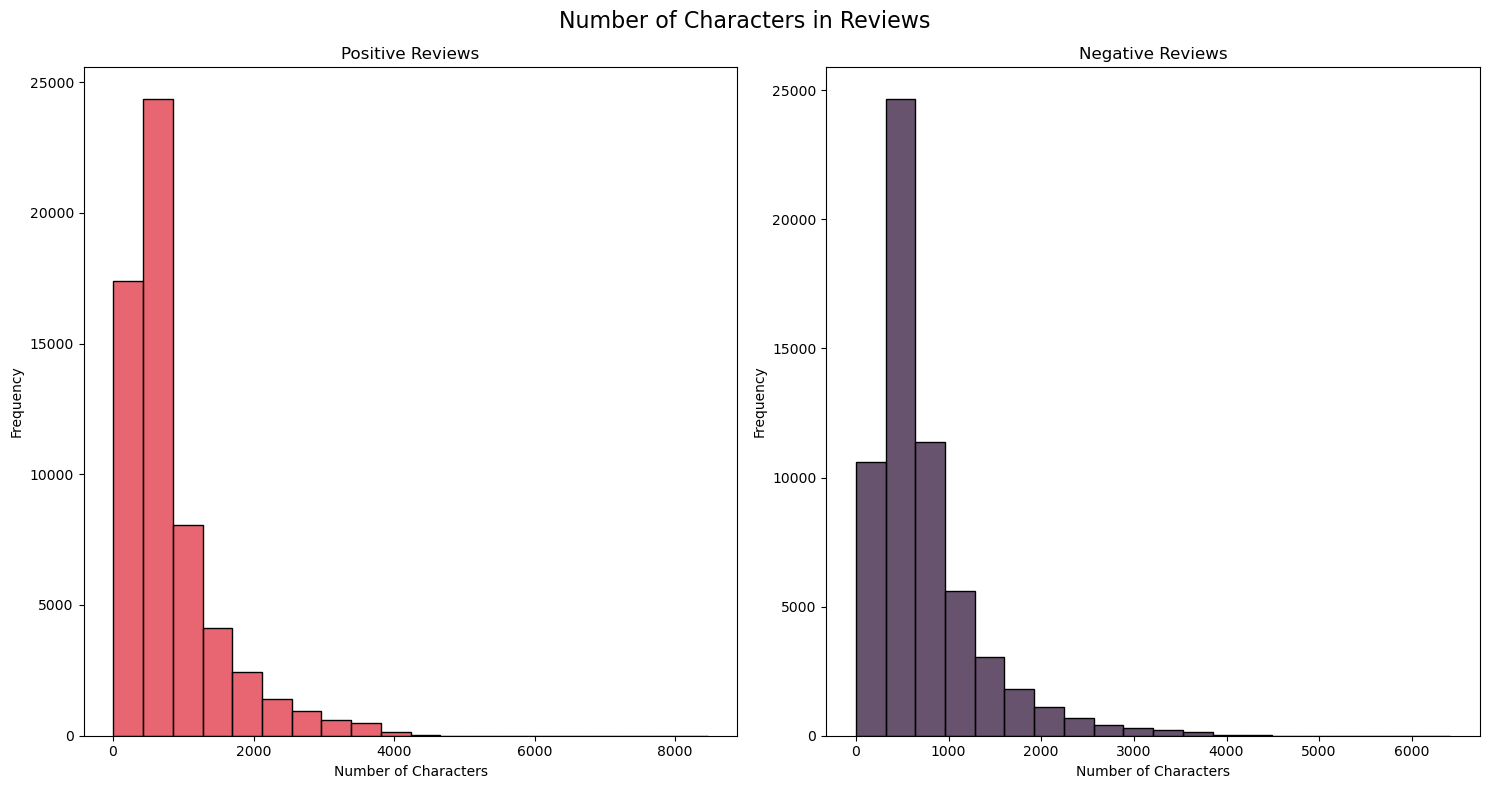

In [73]:
fig, (pos_ax, neg_ax) = plt.subplots(1, 2, figsize=(15, 8))

# Calculate the number of characters in positive reviews
len_pos_review = df[df['Ratings'] >= 7]['Reviews_clean'].str.len()
sns.histplot(len_pos_review, ax=pos_ax, color=sns.color_palette("rocket_r")[2], bins=20)
pos_ax.set_title('Positive Reviews')
pos_ax.set_xlabel('Number of Characters')
pos_ax.set_ylabel('Frequency')

# Calculate the number of characters in negative reviews
len_neg_review = df[df['Ratings'] <= 4]['Reviews_clean'].str.len()
sns.histplot(len_neg_review, ax=neg_ax, color=sns.color_palette("rocket_r")[5], bins=20)
neg_ax.set_title('Negative Reviews')
neg_ax.set_xlabel('Number of Characters')
neg_ax.set_ylabel('Frequency')

fig.suptitle('Number of Characters in Reviews', fontsize=16)
plt.tight_layout()
plt.show()

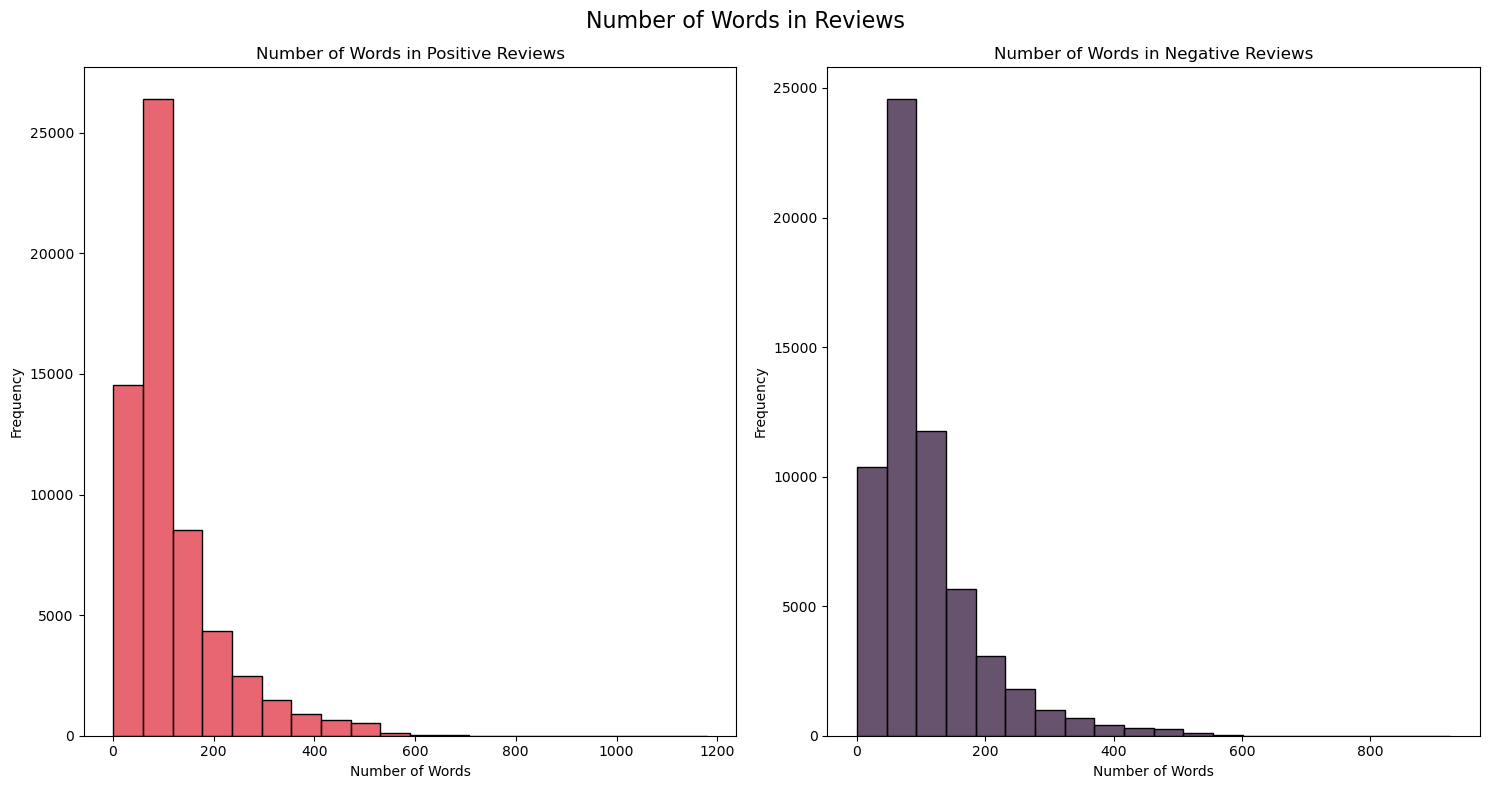

In [74]:
fig, (pos_ax, neg_ax) = plt.subplots(1, 2, figsize=(15, 8))

# Calculate and plot the histogram for positive reviews
pos_word = df[df['Ratings'] >= 7]['Reviews_clean'].str.split().map(lambda review: len(review))
sns.histplot(pos_word, ax=pos_ax, color=sns.color_palette("rocket_r")[2], bins=20)
pos_ax.set_title('Number of Words in Positive Reviews')
pos_ax.set_xlabel('Number of Words')
pos_ax.set_ylabel('Frequency')

# Calculate and plot the histogram for negative reviews
neg_word = df[df['Ratings'] <= 4]['Reviews_clean'].str.split().map(lambda review: len(review))
sns.histplot(neg_word, ax=neg_ax, color=sns.color_palette("rocket_r")[5], bins=20)
neg_ax.set_title('Number of Words in Negative Reviews')
neg_ax.set_xlabel('Number of Words')
neg_ax.set_ylabel('Frequency')

fig.suptitle('Number of Words in Reviews', fontsize=16)
plt.tight_layout()
plt.show()


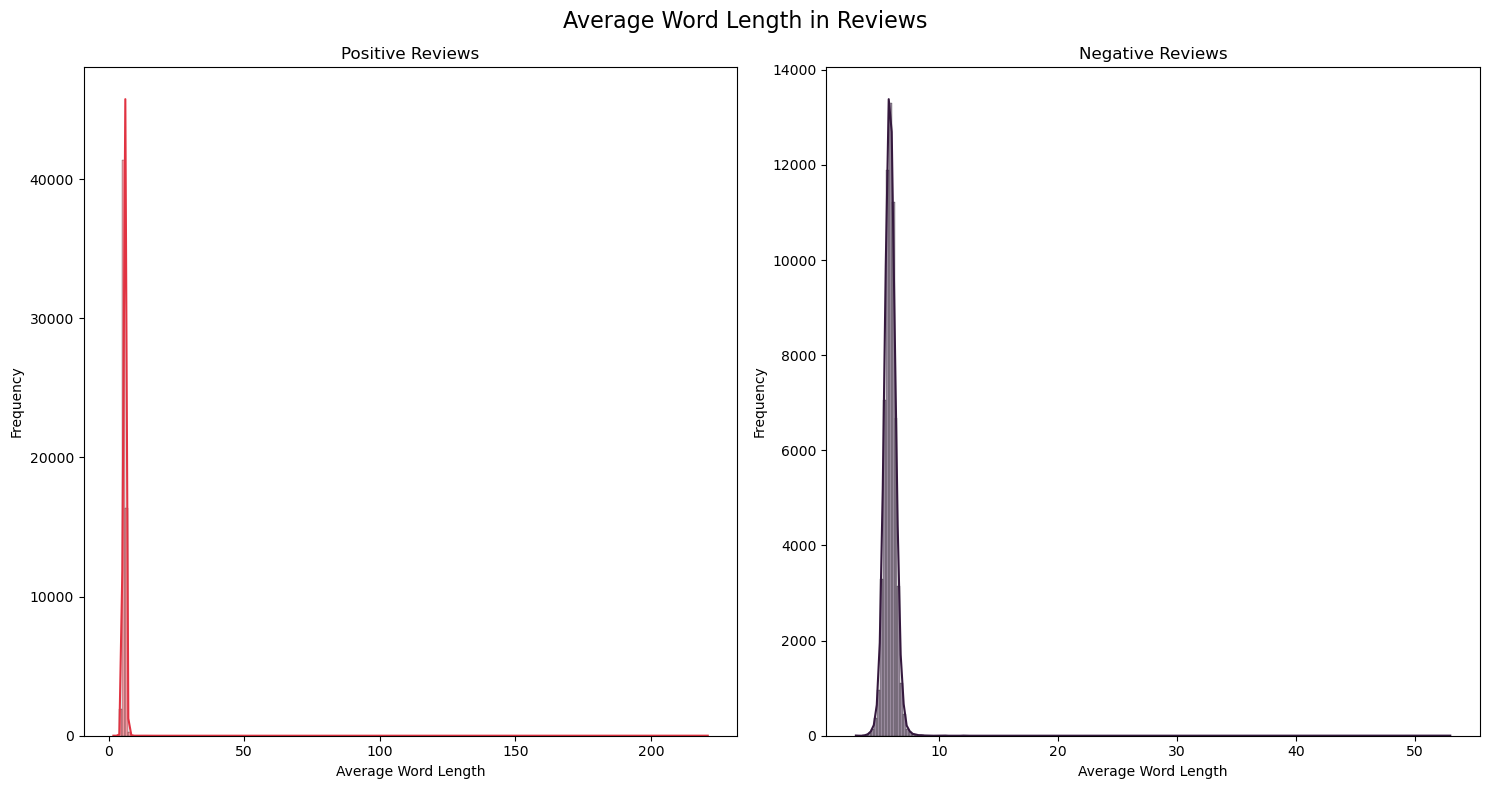

In [75]:
fig, (pos_ax, neg_ax) = plt.subplots(1, 2, figsize=(15, 8))

# Calculate the average word length in positive reviews
pos_word = df[df['Ratings'] >= 7]['Reviews_clean'].str.split().apply(lambda x: [len(i) for i in x])
avg_word_length_pos = pos_word.map(lambda x: np.mean(x))
sns.histplot(avg_word_length_pos, ax=pos_ax, color=sns.color_palette("rocket_r")[2], bins=200, kde=True)
pos_ax.set_title('Positive Reviews')
pos_ax.set_xlabel('Average Word Length')
pos_ax.set_ylabel('Frequency')

# Calculate the average word length in negative reviews
neg_word = df[df['Ratings'] <= 4]['Reviews_clean'].str.split().apply(lambda x: [len(i) for i in x])
avg_word_length_neg = neg_word.map(lambda x: np.mean(x))
sns.histplot(avg_word_length_neg, ax=neg_ax, color=sns.color_palette("rocket_r")[5], bins=200, kde=True)
neg_ax.set_title('Negative Reviews')
neg_ax.set_xlabel('Average Word Length')
neg_ax.set_ylabel('Frequency')

fig.suptitle('Average Word Length in Reviews', fontsize=16)
plt.tight_layout()
plt.show()

In [76]:
def get_top_text(corpus, n, ngram):
    vec = CountVectorizer(ngram_range=(ngram, ngram)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = sorted(list(zip(vec.get_feature_names_out(), sum_words.A1)), key=lambda x: x[1], reverse=True)
    return words_freq[:n]

In [77]:
most_common_word = get_top_text(df['Reviews_clean'][df['Ratings'] >= 7], 20, 1)
temp = pd.DataFrame(most_common_word, columns=["Common_words", "Count"])

fig = px.bar(temp, x = 'Count', y = 'Common_words', title = 'Common Words in Positive Reviews', 
             orientation = 'h', width = 1000, height = 1000, color = 'Common_words',
             labels = {'Common_words': 'Common words'}, color_discrete_sequence = px.colors.sequential.Inferno)

fig.update_layout(showlegend=False)
fig.show()

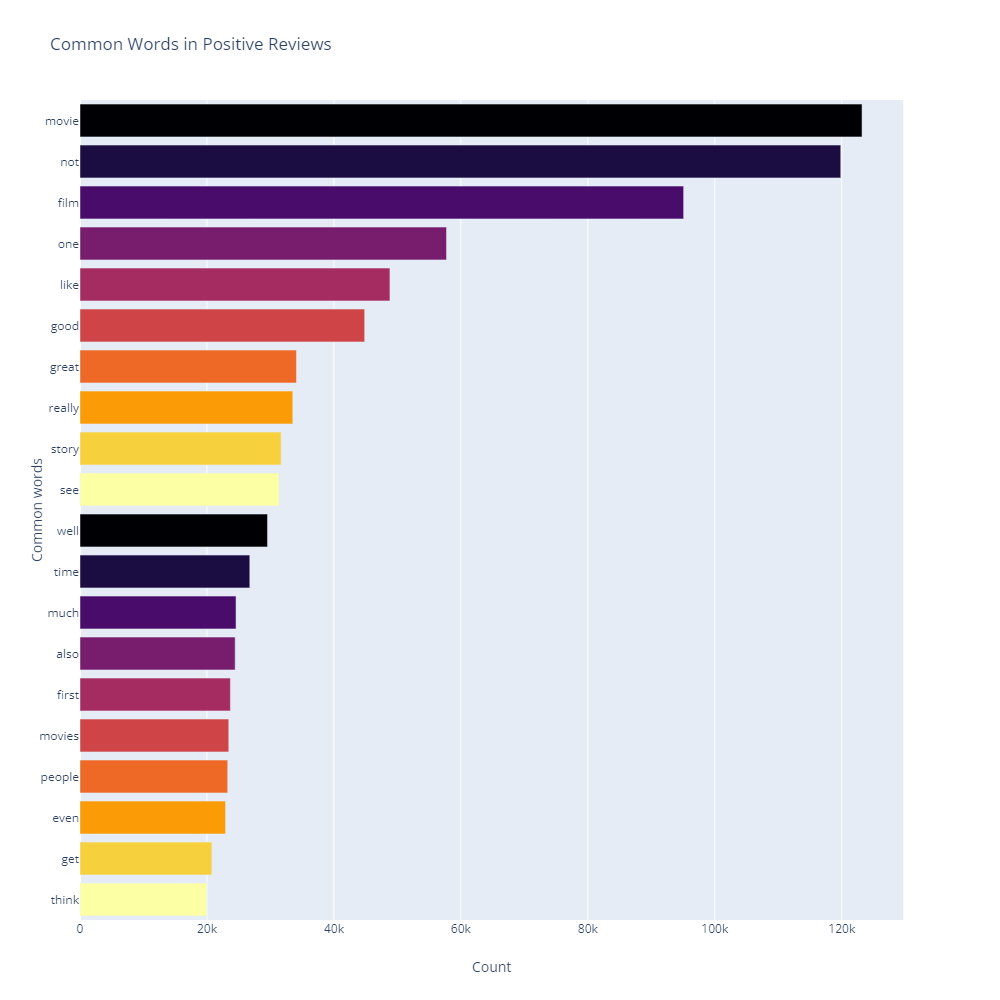


In [78]:
most_common_word = get_top_text(df.Reviews_clean[df['Ratings']>=7], 20, 2)
most_common_word = dict(most_common_word)

temp = pd.DataFrame(columns = ['Common_words', 'Count'])
temp['Common_words'] = list(most_common_word.keys())
temp['Count'] = list(most_common_word.values())

fig = px.bar(temp, x = 'Count', y = 'Common_words', title = 'Commmon bigram words in Positive Reviews', orientation='h', 
             width = 1000, height = 1000, color = 'Common_words', labels = {'Common_words': 'Common words'}, 
             color_discrete_sequence = px.colors.sequential.Inferno)

fig.update_layout(showlegend=False)
fig.show()

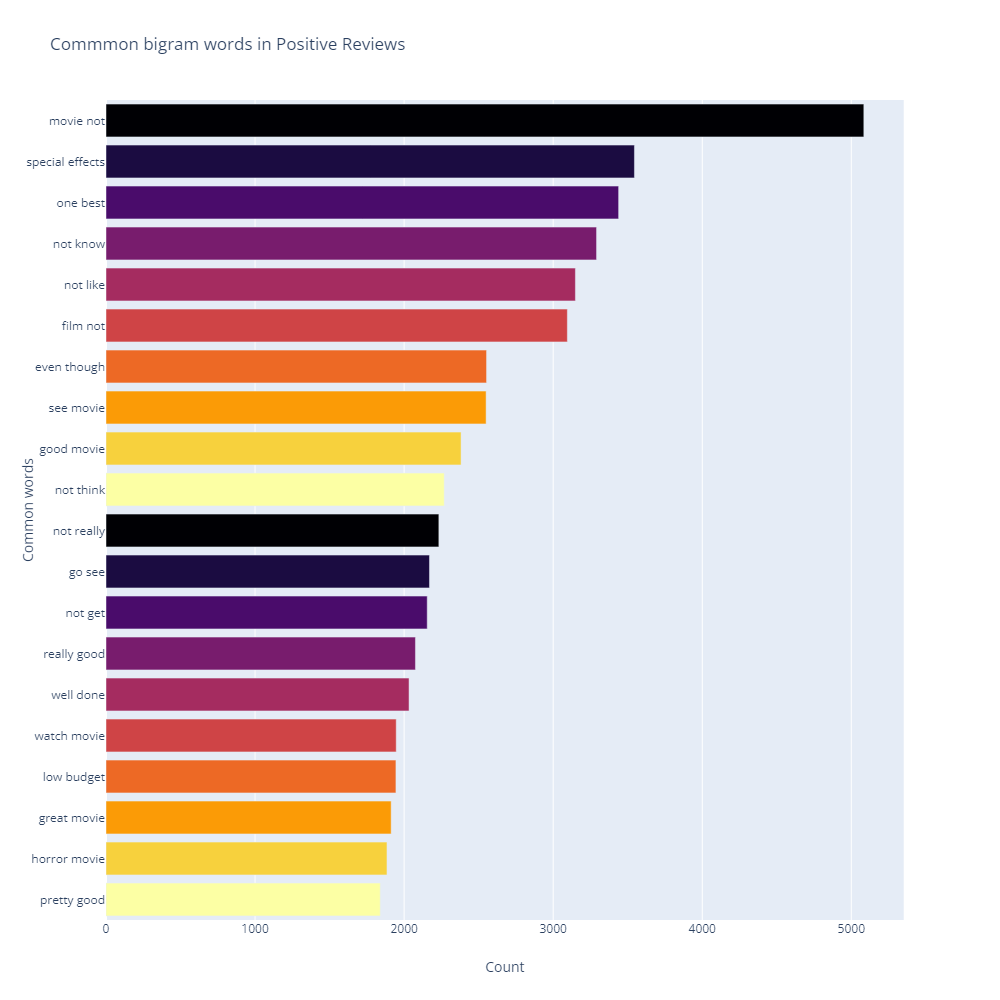


In [79]:
most_common_word = get_top_text(df.Reviews_clean[df['Ratings'] >= 7], 20, 3)
most_common_word = dict(most_common_word)

temp = pd.DataFrame(columns=['Common_words', 'Count'])
temp['Common_words'] = list(most_common_word.keys())
temp['Count'] = list(most_common_word.values())

fig = px.bar(temp, x='Count', y='Common_words', title='Common trigram words in Positive Reviews', orientation='h',
             width=1000, height=1000, color = 'Common_words', labels = {'Common_words': 'Common words'}, color_discrete_sequence=px.colors.sequential.Inferno)

fig.update_layout(showlegend=False)
fig.show()

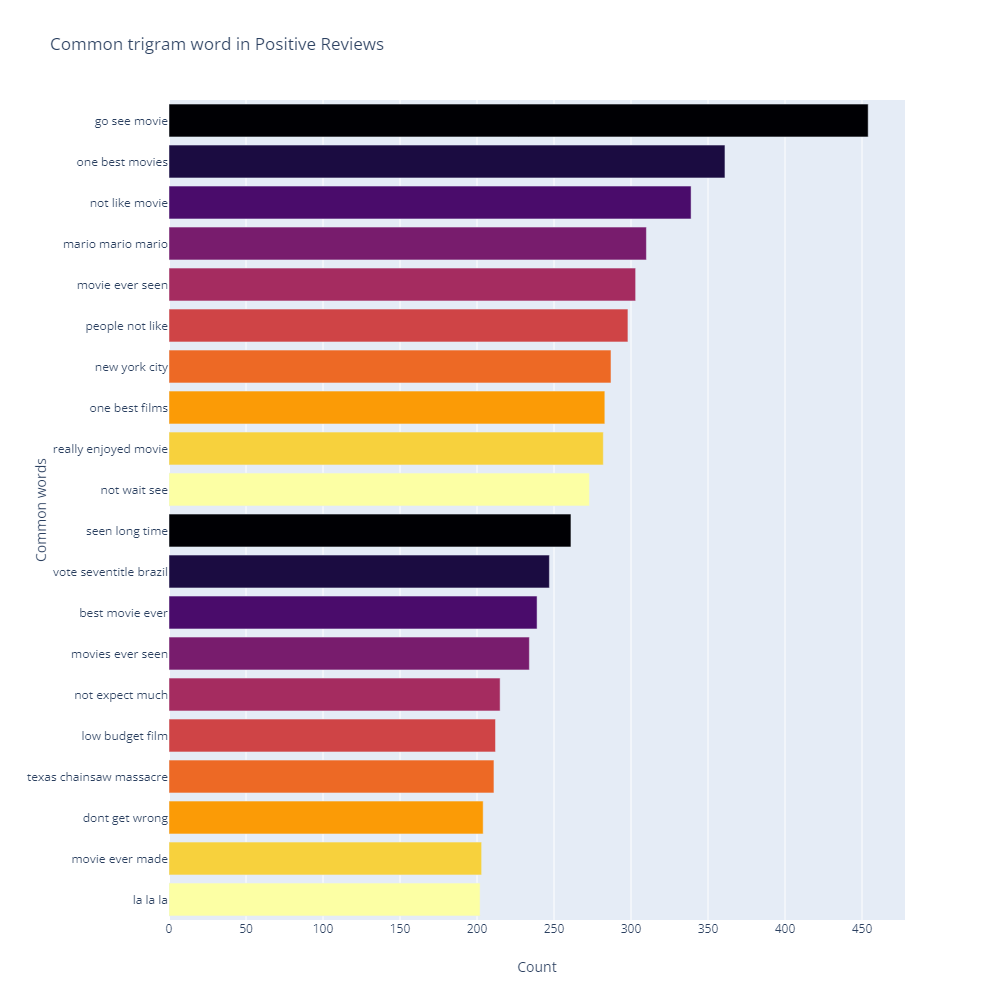


In [80]:
pd.options.display.max_colwidth = 1000
filtered_df = df[(df['Ratings'] >= 7) & (df['Reviews'].str.contains("not like|not want|not big fan"))]
result_df = filtered_df[["Reviews", "Ratings", "Movies"]]
result_df.head(3)

,Reviews,Ratings,Movies
90193,"Starring: Carmen Electra and Brooke Hogan.Scary fish story that really has a lot going for it – Scares,Girls in bikinis and a creature that is NEW ! So let's go out to sea and study,No not like ""The Suite Life On Deck"",But more like Fred Olen Ray 'Showtime' movies in the water.There are villains without fins and people with Brains & Boobs.The creature effects are really good looking as CGI and just fun when do in real time and on set with actors interacting with the teeth plus.This ATOLL set would make a great tourist attraction with a re-tooled 'BRUCE the shark' that was replaced at Universal Studios,Florida.",7,2-Headed Shark Attack
90198,"Some folks really downgraded this movie and the two main stars, Casper Van Dien and Elelnia Eliniak by stating their careers were over because of this movie. Come on folks these two are professional actors and know how to act. This movie was not as horrible as some would have us believe nor did their careers end. Just because one did not like the movie is no reason to slam dunk the actors. The movie was actually quite good because of the two main stars It's quite conceivable for a character named Van Helsing not to know at one time in earths ancient culture he had a relative who was a vampire killer. As far as the script it was okay, the cinematography was good as far as one can be from being inside a spacecraft. The vampires exhibited great strength and stealth. They were tall dark and handsome or beautiful and tempting. In the end all the vampires were slain at the expense of most of the crew. To see which vampire remains and which crew members remain and how the movie ends which...",7,Dracula 3000
90222,"Alone in the Dark 2 is a fun little Supernatural Thriller with a good little cast & i enjoyed it, it looks like a movie & was actually filmed on film which was very rare back then, & even more rare now it's almost extinct, it's all digital now only ""Tarantino"" still uses film that I've heard of!!!\nAlso the film looks very good with good use of colour & a very slick look with lots of blue & green, a very cool opening actually with a view of new york city & central park, then we go down to central park where we meet 3 witch hunters running from the old Hag, it's very cool.\nThe first film was just ok, not great but not as terrible as all those way over the top reviews destroying it was saying, as there's alot of much worse films out there!!!\nThe music is really good, it's eerie & full of suspense & this little B-movie actually has a strong creepy atmosphere & feels like one of those rare Horror gems you find on t.v in the middle of the night, good solid film.""Alone in the Dark 2"" r...",7,Alone in the Dark II


In [81]:
pd.options.display.max_colwidth = 1000
filtered_df = df[(df['Ratings'] >= 9) & (df['Reviews'].str.contains("bad review"))]
result_df = filtered_df[["Reviews", "Ratings", "Movies"]]
result_df.head(3)

,Reviews,Ratings,Movies
120211,"This movie was a blast for my little guys, they loved every minute of it, I have read all of the bad reviews, and could not disagree more. This movie, is pure and good. There is just enough action to keep the kids interested, and not so much that you leave the theater with them bouncing off the walls either. It is funny with jokes that everyone can appreciate. I think people have gotten used to so much violence and adult content in our kids movies that they are disappointed when it is missing, like the movie wasn't entertaining enough for the parents. Well, NEWS FLASH.....It's a kids movie, and a perfect one at that. Kids need these kinds of movies, not Spongebob and the like which are more to entertain the parents.",9,Doogal
120238,"I am a huge horror buff and prefer pieces that delve into the characters psychological issues. This film was awesome on so many levels, the acting and writing were fantastic and creepy and I was afraid or and empathetic with the murderer the whole time. What an interesting study on the line between sick and a danger to others, and the line between being a mean girl and being psychotic. Set in a great location, a house full of creepy art, in the winter in Conneticut and with amazing performances from many of my favorite actresses. It actually shocks me that others have given this such a bad review, I loved this movie, I guess it goes to show you everyone will have a different opinion but I say don't miss this film!",9,#Horror
120239,"No idea why there are so many bad reviews here? I loved it; I thought it was a very advanced thoughtful film. The graphic were #killer. The comparison of video game culture and young girl culture was spot on. This film makes connections that I've never seen on the big screen but, do see in every day life.The casting was spot on, Hello 12 year-old girls are supposed to be a little annoying. I do wish that more directors would take color into more consideration the way this film does. T The highly stylized sets make the murder scenes more believable because everything is so unbelievable. How can you live in 2016 and not ""get""a film about social media and accelerationism. #duh Someone explain this to me.",9,#Horror


In [82]:
pd.options.display.max_colwidth = 1000
filtered_df = df[(df['Ratings'] <= 4) & (df['Reviews'].str.contains("blah blah blah|la la la la|mario mario mario"))]
result_df = filtered_df[["Reviews", "Ratings", "Movies"]]
result_df.head(3)

,Reviews,Ratings,Movies
571,"Well I wasn't sure what language this film was made in - so I put it through Babel Fish. Here is a typical line translated:'Blah blah blah..blah blah blah blah, blah de blah'.This actually makes more sense than the lines the actors were uttering.Effects wise I spotted left over props from Voyage to the bottom of the Sea (Think Giant squids and Fish Men)Best line (from a cigar smoking middle aged Man to a 9 year old) 'This World's become a place where boys like you and me have to grow up fast' (he looks at least 50 for God's sake)This film makes a previous SyFy effort (Savage planet - about alien killer bears) look like a masterpiece.Great going guys :)",1,War of the Worlds 2: The Next Wave
1070,"No, it doesn't. This is the WORST show. If you can even call it that, on the internet. Don't worry, I am not that kind of guy who bashes on kids for making videos, usually they're actually as good as work done by adults, just maybe the voices are different. But not here. Once you watch just one of his videos you immediately hate Lucas, the infamous maker of ""Fred"", and plays as him. You don't care about his personal life or ANYTHING, all you want and need to do is tell him off. He got MOST subscribed on You Tube for months on end, and he does NOT deserve that badge. I wouldn't mind if he were an O.K actor but, he just... let me explain. A Fred video in a nutshell... ""Blah blah blah blah blah O.M.G Judy ha i am so not funny blah blah blah pointless yelling wow look Kevin blah blah blah mom comes home and says something unfunny, blah blah blah, subscribe. To the person who just wasted your time and gave you partial deafness in your ears."" All that and some high pitching easily done i...",1,Fred
3534,"This is truly a horrid movie. But (maybe..) worth watching once because it's an instant, modern camp classic.Now, if you notice, I only submit bad reviews to this site, but that's because bad movies are a hobby of sorts for me. I'm one who thinks you can learn more about film from bad movies than good ones, and if there is any thuth to that, every film student's thesis should be written about Battlefield Earth.You don't just wonder what they were thinking. You're amazed that so many people had to be so incompetent for this movie to get released. It defies comprehension. They had the budget, some (well, ok.. ) 'capable' (servicable might be a better term) actors.. so how could any outfit fail so miseraby?It's an amazing film in all the ways that it sucks. It combines all the elements of a horrid film - employs characters which don't develop in any way, that you don't care about (or even root against), who act in very irrational or excessively stupid ways for the purpose of lengtheni...",1,Battlefield Earth


In [83]:
most_common_word = get_top_text(df['Reviews_clean'][df['Ratings'] <= 4], 20, 1)
most_common_word = dict(most_common_word)

temp = pd.DataFrame(columns=['Common_words', 'Count'])
temp['Common_words'] = list(most_common_word.keys())
temp['Count'] = list(most_common_word.values())

fig = px.bar(temp, x = 'Count', y = 'Common_words', title = 'Common unigram words in Negative Reviews', orientation = 'h',
             width = 1000, height = 1000, color = 'Common_words', labels = {'Common_words': 'Common words'}, color_discrete_sequence=px.colors.sequential.Inferno)

fig.update_layout(showlegend=False)
fig.show()

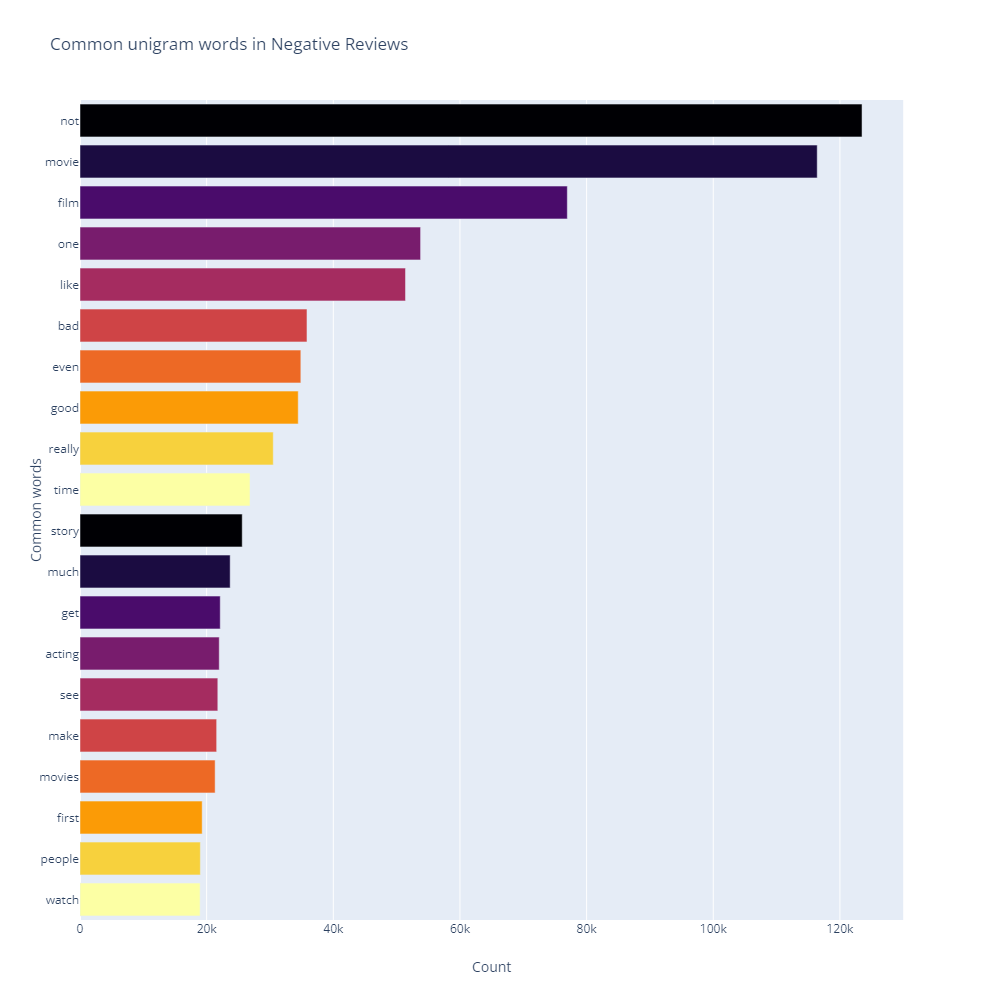


In [84]:
most_common_word = get_top_text(df['Reviews_clean'][df['Ratings'] <= 4], 20, 2)
most_common_word = dict(most_common_word)

temp = pd.DataFrame(columns=['Common_words', 'Count'])
temp['Common_words'] = list(most_common_word.keys())
temp['Count'] = list(most_common_word.values())

fig = px.bar(temp, x='Count', y='Common_words', title='Common bigram words in Negative Reviews',
             orientation='h', width=1000, height=1000, color='Common_words', labels={'Common_words': 'Common words'}, 
             color_discrete_sequence=px.colors.sequential.Inferno)

fig.update_layout(showlegend=False)
fig.show()

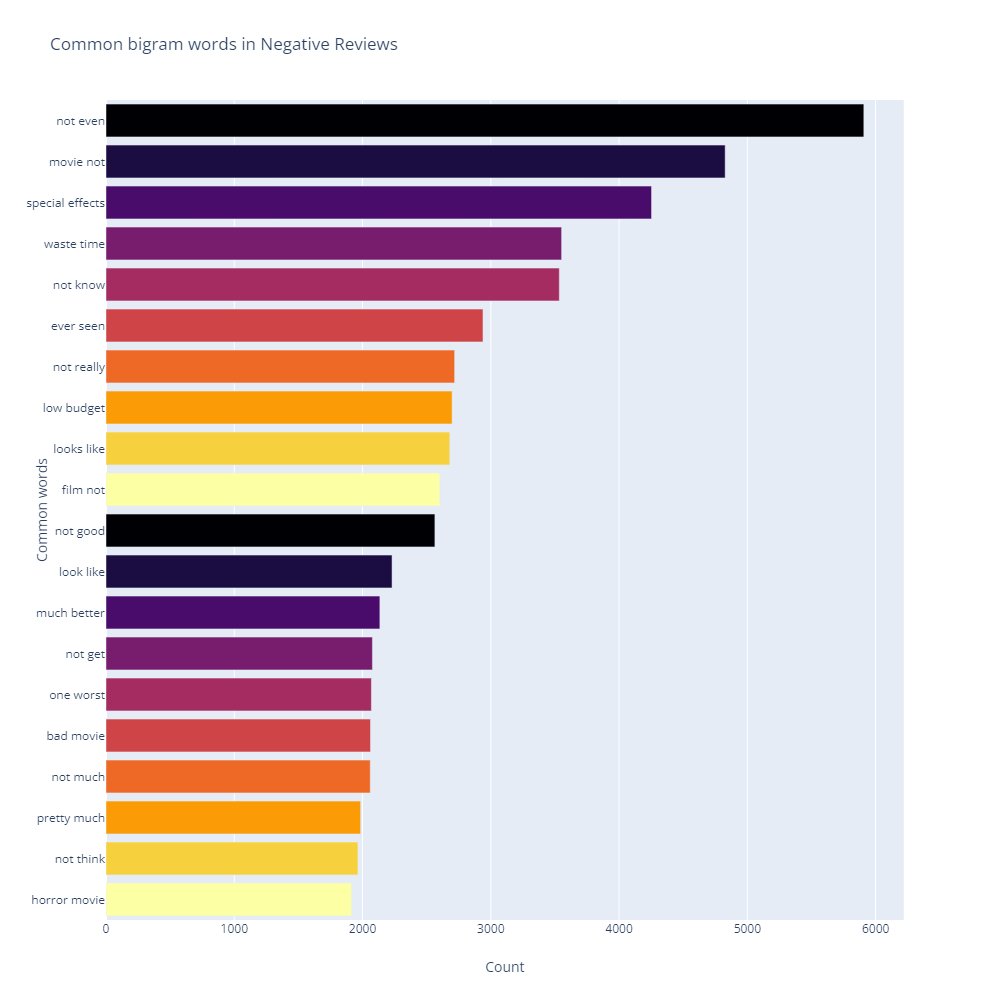


In [85]:
most_common_word = get_top_text(df['Reviews_clean'][df['Ratings'] <= 4], 20, 3)
most_common_word = dict(most_common_word)

temp = pd.DataFrame(columns=['Common_words', 'Count'])
temp['Common_words'] = list(most_common_word.keys())
temp['Count'] = list(most_common_word.values())

fig = px.bar(temp, x='Count', y='Common_words', title='Common trigram words in Negative Reviews',
             orientation='h', width=1000, height=1000, color='Common_words', labels={'Common_words': 'Common words'}, 
             color_discrete_sequence=px.colors.sequential.Inferno)

fig.update_layout(showlegend=False)
fig.show()

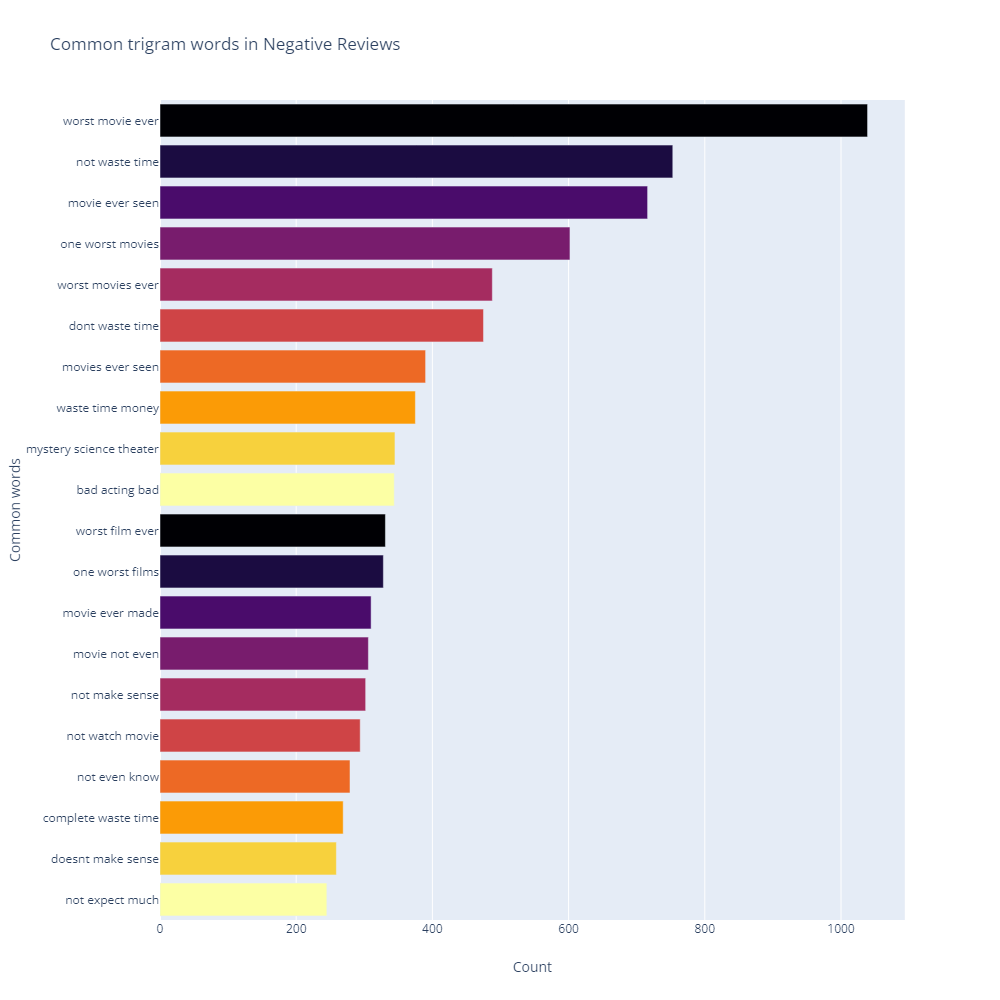


In [86]:
pd.options.display.max_colwidth = 1000
filtered_df = df[(df['Ratings'] <= 4) & (df['Reviews_clean'].str.contains("good|great"))]
result_df = filtered_df[["Reviews", "Ratings", "Movies"]]
result_df.head(3)

,Reviews,Ratings,Movies
3,"If you saw the other previous spoof movies by these two horrible gentlemen, then you should know that this already will be bad. I'll tell you the truth, if you want to watch it as a brainless person (ironically meant for the stereotypical teenagers, which I am not) then you will laugh at it a bit. But if you judge it, even a little, the movie automatically fails. Why? Never ask that when it comes to these two men.Remember the good old Hollywood days whenever making a movie was about showing people a type of art, and also a story that kept you on the edge of your seat? Well whenever word hit that making films earned you loads of cash, then all these greedy people came in the picture and its quite pathetic. These two are no exception. We still have movie artists (most notably the genius that is Christopher Nolan). But these two guys just...well I've been writing so big words, let me put it in simple terms for these guys...These guys suck, they are not artists, but instead money cravi...",1,Disaster Movie
6,"I was given a free ticket to this film; so I can't complain that I was ripped off (except in that some 90 minutes of my life were irretrievably stolen from me). These sort of movies (Date Movie, Epic Movie, Meet the Spartans) haven't been funny for some time now but ""Disaster Movie"" has reached a new low. There wasn't one real laugh anywhere in the film, and most of the alleged ""jokes"" were actually painful. (There was a considerable amount of childish, mean-spirited stuff in the form of racist, sexist, and especially homophobic, garbage present, along with ample helpings of juvenile gross-outs.) None of the actors were even bothering to put up any pretense of acting. There is nothing hip, clever, or even mildly intelligent going on here. The entire film is from beginning to end crass, vulgar, irrational, and utterly humorless in any human sense. I know that in the past these sort of trash has made enough money to keep Seltzer et al., grinding them out but ""Disaster Movie"" may just...",1,Disaster Movie
7,"OK, so ""Disastrous"" isn't an imaginative barb for this movie, but then there's not a shred of wit to the movie, so....I saw this movie for free. A friend who said he ""pissed his pants"" at the trailer had free passes. I think he's incontinent.A spoof of disaster movies might have been fun. This is not it. A couple disaster movies get referenced, not really spoofed. Instead, the ""spoofing"" is of recent movies of all genres, and of aspects of current pop-culture. Then again, how current is women's wrestling or the ""Head On"" commercials?If there's anything about it that's good, there's the 70 minute or so running time (where did they get 90 minutes?) and Nicole Parker seems like she might be good, if she had good material.",1,Disaster Movie


# **FEATURE ENGINEERING AND FEATURE SELECTION**

In [87]:
#Mapping rating data to Binary label 1 (+ve) if rating >=7 and 0 (-ve) if rating <=4 and 2 (neutral) if rating = 5 or 6
df['Label'] = df['Ratings'].apply(lambda x: '1' if x >= 7 else ('0' if x<=4 else '2'))

#Removing 
df=df[df.Label<'2']
data=df[['Reviews_clean','Label']]
print(data['Label'].value_counts())

0    60000
1    60000
Name: Label, dtype: int64


In [88]:
# lemmatization of word 
class LemmaTokenizer(object):
    def __init__(self):
        self.wordnetlemma = WordNetLemmatizer()
    def __call__(self, reviews):
        return [self.wordnetlemma.lemmatize(word) for word in word_tokenize(reviews)]

## **Unigram**


In [89]:
# Vectoization with Count Vectorizer and TDIDF Vectorizer with Unigram
nltk.download('punkt')
nltk.download('omw-1.4')

train,test=train_test_split(data,test_size=.3,random_state=42, shuffle=True)
countvect = CountVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(1,1), min_df=10,max_features=500)
tfidfvect = TfidfVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(1,1),min_df=10,max_features=500)
x_train_count = countvect.fit_transform(train['Reviews_clean']).toarray()
x_test_count = countvect.transform(test['Reviews_clean']).toarray()
x_train_tfidf = tfidfvect.fit_transform(train['Reviews_clean']).toarray()
x_test_tfidf = tfidfvect.transform(test['Reviews_clean']).toarray()
y_train = train['Label']
y_test = test['Label']

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admins\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Admins\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [90]:
# Feature Importance with Logistic Regression and Count Vectorizer with unigram
lgr = LogisticRegression()
lgr.fit(x_train_count,y_train)
lgr.score(x_test_count,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature", "Score"])
features = countvect.get_feature_names_out()

for feature, importance in zip(features, lgr.coef_[0]):
    if i<=200:
        importantfeature.add_row([feature, importance])
        i=i+1
print(importantfeature)

+----------------+------------------------+
|    Feature     |         Score          |
+----------------+------------------------+
|      able      |   0.0837756589541808   |
|   absolutely   |  0.052124584932327835  |
|      act       |  -0.16788945161507854  |
|     acting     |  -0.17758059189948272  |
|     action     |   0.270205422407503    |
|     actor      |  -0.1339795157324253   |
|    actress     |  -0.15283597782711494  |
|    actually    | -0.048416924457403976  |
|      add       |  0.03181307336065256   |
|     adult      |  0.07541779430591206   |
|      age       |   0.1036364654443905   |
|     alien      |   -0.076442699091558   |
|     almost     | -0.012213086756556715  |
|     along      |  0.11827716609508983   |
|    already     |  -0.19418458212318146  |
|      also      |   0.1015157157234374   |
|    although    |  0.18051612264112527   |
|     always     |  0.21046699852907777   |
|    amazing     |   0.8643580696464963   |
|    american    |  0.0460088024

In [91]:
# Feature Importance with TFIDF vectorizer and Logistic Regression with Unigram 

lgr = LogisticRegression()
lgr.fit(x_train_tfidf,y_train)
lgr.score(x_test_tfidf,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature", "Score"])
features = tfidfvect.get_feature_names_out()
for feature, importance in zip(features, lgr.coef_[0]):
    if i<=100:
        importantfeature.add_row([feature, importance])
        i=i+1
print(importantfeature)

+----------------+-----------------------+
|    Feature     |         Score         |
+----------------+-----------------------+
|      able      |   0.3742973738617414  |
|   absolutely   |  0.41306224824563315  |
|      act       |   -1.096181719441912  |
|     acting     |  -1.6427641567602542  |
|     action     |   2.560035072024328   |
|     actor      |  -1.3939426503804493  |
|    actress     |  -1.0060598618937322  |
|    actually    |  -0.4207288961803805  |
|      add       |   0.1478513928515071  |
|     adult      |   0.6855734534150743  |
|      age       |   0.8075579215104595  |
|     alien      |  -0.31316554742988284 |
|     almost     |  -0.26918180452621837 |
|     along      |   0.7216462130238273  |
|    already     |  -1.0923196606047638  |
|      also      |   1.2354678833140276  |
|    although    |   1.0757105303840795  |
|     always     |   1.7542862272925073  |
|    amazing     |   4.783161482568083   |
|    american    |  0.38857017522192155  |
|    annoyi

## **BI gram**


In [92]:
train, test = train_test_split(df, test_size=.3, random_state=42, shuffle=True)
countvect = CountVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(2,2), min_df=10, max_features=500)
tfidfvect = TfidfVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(2,2), min_df=10, max_features=500)
x_train_count = countvect.fit_transform(train['Reviews_clean']).toarray()
x_test_count = countvect.transform(test['Reviews_clean']).toarray()
x_train_tfidf = tfidfvect.fit_transform(train['Reviews_clean']).toarray()
x_test_tfidf = tfidfvect.transform(test['Reviews_clean']).toarray()
y_train = train['Label']
y_test = test['Label']

In [93]:
lgr = LogisticRegression()
lgr.fit(x_train_count,y_train)
lgr.score(x_test_count,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature", "Score"])
for feature, importance in zip(countvect.get_feature_names_out(), lgr.coef_[0]):
    if i<=200:
        importantfeature.add_row([feature, importance])
        i=i+1
print(importantfeature)

+-----------------------+-----------------------+
|        Feature        |         Score         |
+-----------------------+-----------------------+
|   absolutely nothing  |  -1.6189087450538113  |
|        act like       |  -0.4844155255934514  |
|       acting bad      |  -1.4393700393373114  |
|      acting good      |   0.5874608671760584  |
|       acting not      |  -0.4428411533732817  |
|      action film      |  0.40846956984456056  |
|      action movie     |   0.3318004397974911  |
|      action scene     |  0.21238859157540652  |
|    action sequence    |  0.14113583304838997  |
|       actor not       |  -0.45331531687215565 |
|      almost every     |  -0.11122759522810863 |
|       along way       |   0.5163316713899426  |
|        also not       |  -0.25144986918535506 |
|      although not     |   0.4586526286586732  |
|     another movie     |  -0.2534978580134264  |
|     anything else     |  -0.3835866432873621  |
|        b movie        |  0.005276349384868982 |


In [94]:
lgr.fit(x_train_tfidf,y_train)
lgr.score(x_test_tfidf,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature", "Score"])
for feature, importance in zip(tfidfvect.get_feature_names_out(), lgr.coef_[0]):
    if i<=50:
        importantfeature.add_row([feature, importance])
        i=i+1
print(importantfeature)

+-----------------------+----------------------+
|        Feature        |        Score         |
+-----------------------+----------------------+
|   absolutely nothing  |  -3.266895352572118  |
|        act like       |  -1.120684698019575  |
|       acting bad      | -3.0056459987843995  |
|      acting good      |  1.2907864270247407  |
|       acting not      | -1.1276449704179998  |
|      action film      |  1.2866461753566143  |
|      action movie     |  0.9799202072707527  |
|      action scene     |  0.5455936975906494  |
|    action sequence    | 0.37814804203775787  |
|       actor not       | -0.9540497337385595  |
|      almost every     | -0.22707284839587302 |
|       along way       |  1.079102091632918   |
|        also not       | -0.4345000205693629  |
|      although not     |  0.9465159208329593  |
|     another movie     | -0.6474064542833491  |
|     anything else     | -0.8074926642390989  |
|        b movie        | -0.16050628277821663 |
|       bad acting  

In [95]:
pd.options.display.max_colwidth = 1000
df[["Reviews","Ratings","Movies"]][(df['Ratings']>=9)&(df['Reviews_clean'].str.contains("bad review"))].head(5)

,Reviews,Ratings,Movies
120047,"While I wouldn't call this the greatest movie ever made, it's not anywhere near as bad as other reviewers have made it out to be. An average rating of 5 or 6 stars would be fair, but 1.5 is harsh and totally undeserved.Ring of Terror feels like an episode of The Twilight Zone stretched to an hour. In fact, it's so much like a TV show that one wonders if it might not have been originally created as a pilot.If you're a fan of 1950s horror/suspense series like Thriller, The Veil, One Step Beyond, Tales of Tomorrow, and Alfred Hitchcock Presents, you'll likely find this a pleasant way to spend an hour, as I did.Normally I would only give this film 6 out of 10 stars, but because others have been panning it so unmercifully, I'm giving it a 9.",9,Ring of Terror
120211,"This movie was a blast for my little guys, they loved every minute of it, I have read all of the bad reviews, and could not disagree more. This movie, is pure and good. There is just enough action to keep the kids interested, and not so much that you leave the theater with them bouncing off the walls either. It is funny with jokes that everyone can appreciate. I think people have gotten used to so much violence and adult content in our kids movies that they are disappointed when it is missing, like the movie wasn't entertaining enough for the parents. Well, NEWS FLASH.....It's a kids movie, and a perfect one at that. Kids need these kinds of movies, not Spongebob and the like which are more to entertain the parents.",9,Doogal
120238,"I am a huge horror buff and prefer pieces that delve into the characters psychological issues. This film was awesome on so many levels, the acting and writing were fantastic and creepy and I was afraid or and empathetic with the murderer the whole time. What an interesting study on the line between sick and a danger to others, and the line between being a mean girl and being psychotic. Set in a great location, a house full of creepy art, in the winter in Conneticut and with amazing performances from many of my favorite actresses. It actually shocks me that others have given this such a bad review, I loved this movie, I guess it goes to show you everyone will have a different opinion but I say don't miss this film!",9,#Horror
120239,"No idea why there are so many bad reviews here? I loved it; I thought it was a very advanced thoughtful film. The graphic were #killer. The comparison of video game culture and young girl culture was spot on. This film makes connections that I've never seen on the big screen but, do see in every day life.The casting was spot on, Hello 12 year-old girls are supposed to be a little annoying. I do wish that more directors would take color into more consideration the way this film does. T The highly stylized sets make the murder scenes more believable because everything is so unbelievable. How can you live in 2016 and not ""get""a film about social media and accelerationism. #duh Someone explain this to me.",9,#Horror
120273,"What do you get when you cross Love Story with Star Wars with Blade Runner with Back to the Future with MTV? Love Story 2050, that's what. What a fun movie for the entire family. This fantasy of epic proportions is much, much better than AI, a similar sci-fi classic. The thrills are non-stop in this blockbuster, from its lead off car chase to bike racing stunts to the vantage point of a moving roller coaster to speeding hover-craft--you will be on the edge of your seat from beginning to end. The version I saw was only partially in English and I still was glued to the screen. I can't wait to see a version with subtitles. The mega budget special effects are out of this world and highly convincing. The future vision of XBox was hilarious. Those who are complaining about how long this movie is simply don't understand Bollywood. The three hours went by quickly; it seemed to be only an hour. There could have been a better twist with the Darth Vader character. For exam

## **Tri-gram**


In [96]:
train,test=train_test_split(data,test_size=.3,random_state=42, shuffle=True)
countvect = CountVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(3,3), min_df=10,max_features=500)
tfidfvect = TfidfVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(3,3),min_df=10,max_features=500)
x_train_count = countvect.fit_transform(train['Reviews_clean']).toarray()
x_test_count = countvect.transform(test['Reviews_clean']).toarray()
x_train_tfidf = tfidfvect.fit_transform(train['Reviews_clean']).toarray()
x_test_tfidf = tfidfvect.transform(test['Reviews_clean']).toarray()
y_train = train['Label']
y_test = test['Label']

In [97]:
lgr = LogisticRegression()
lgr.fit(x_train_count,y_train)
lgr.score(x_test_count,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature", "Score"])
for feature, importance in zip(countvect.get_feature_names_out(), lgr.coef_[0]):
    if i<=200:
        importantfeature.add_row([feature, importance])
        i=i+1
print(importantfeature)

+---------------------------+-----------------------+
|          Feature          |         Score         |
+---------------------------+-----------------------+
|       acting not bad      |  0.04576663822142033  |
|     acting pretty good    |   0.7793363843848437  |
|   acting special effect   |  -0.5738102428029623  |
|      action movie not     |   1.0425282211866256  |
|     action take place     |  0.012835409923227724 |
|       actor good job      |   0.5052685239292639  |
|    actually pretty good   |   0.239536785739203   |
|    actually quite good    |  -0.18202112361298048 |
|     almost every scene    |  -0.32604064616543044 |
|       bad acting bad      |  -2.2577855409540053  |
|        bad bad bad        |   -1.537642185208144  |
|      bad horror movie     |   -1.07800502956344   |
|       bad movie not       |  -0.8555327945476934  |
|        bad not even       |   -1.751415637049229  |
|       bad script bad      |  -1.4117191742811737  |
|     bad special effect    

In [98]:
lgr = LogisticRegression()
lgr.fit(x_train_tfidf,y_train)
lgr.score(x_test_tfidf,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature", "Score"])
for feature, importance in zip(countvect.get_feature_names_out(), lgr.coef_[0]):
    if i<=200:
        importantfeature.add_row([feature, importance])
        i=i+1
print(importantfeature)

+---------------------------+-----------------------+
|          Feature          |         Score         |
+---------------------------+-----------------------+
|       acting not bad      |  0.05482637851744787  |
|     acting pretty good    |   0.8542908583637688  |
|   acting special effect   |  -0.6066859172021467  |
|      action movie not     |   1.2112738661472846  |
|     action take place     |  0.07841408396670897  |
|       actor good job      |   0.5795062983763078  |
|    actually pretty good   |  0.23973987401237767  |
|    actually quite good    |  -0.16348576509036317 |
|     almost every scene    |  -0.4007881784347673  |
|       bad acting bad      |  -2.6657158015092324  |
|        bad bad bad        |  -2.3018250148471706  |
|      bad horror movie     |  -1.5093917262379675  |
|       bad movie not       |  -1.2307698674392025  |
|        bad not even       |   -2.089599623659508  |
|       bad script bad      |  -1.7164985945390354  |
|     bad special effect    

## **4-gram**


In [99]:
train,test=train_test_split(data,test_size=.3,random_state=42, shuffle=True)
countvect = CountVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(4,4), min_df=10,max_features=500)
tfidfvect = TfidfVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(4,4),min_df=10,max_features=500)
x_train_count = countvect.fit_transform(train['Reviews_clean']).toarray()
x_test_count = countvect.transform(test['Reviews_clean']).toarray()
x_train_tfidf = tfidfvect.fit_transform(train['Reviews_clean']).toarray()
x_test_tfidf = tfidfvect.transform(test['Reviews_clean']).toarray()
y_train = train['Label']
y_test = test['Label']

In [100]:
lgr = LogisticRegression()
lgr.fit(x_train_count,y_train)
lgr.score(x_test_count,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature", "Score"])
for feature, importance in zip(countvect.get_feature_names_out(), lgr.coef_[0]):
    if i<=200:
        importantfeature.add_row([feature, importance])
        i=i+1
print(importantfeature)

+------------------------------------------------+-----------------------+
|                    Feature                     |         Score         |
+------------------------------------------------+-----------------------+
|         abraham lincoln vampire hunter         |  0.22565837705638522  |
|           absolute worst movie ever            |  -0.9536692811862003  |
|               act way paper bag                |  -1.2998842185396202  |
|           acting also great special            |   0.3237861957502315  |
|             acting bad script bad              |  -1.2165476661136683  |
|             acting worst ever seen             |  -1.8631148986267247  |
|     addictive consistently compelling show     |  0.07206913011820201  |
|             also great acting also             |  0.16135075947214464  |
|           also great special effect            |   0.8615685259388138  |
|       annoying illogical decision making       | -0.044943112692628615 |
|           another film 

In [101]:
lgr = LogisticRegression()
lgr.fit(x_train_tfidf,y_train)
lgr.score(x_test_tfidf,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature", "Score"])
for feature, importance in zip(tfidfvect.get_feature_names_out(), lgr.coef_[0]):
    if i<=200:
        importantfeature.add_row([feature, importance])
        i=i+1
print(importantfeature)

+------------------------------------------------+-----------------------+
|                    Feature                     |         Score         |
+------------------------------------------------+-----------------------+
|         abraham lincoln vampire hunter         |  0.14807837107927502  |
|           absolute worst movie ever            |  -1.1973463983969617  |
|               act way paper bag                |   -1.308530028110953  |
|           acting also great special            |   0.6458279400393592  |
|             acting bad script bad              |  -1.4786993683428464  |
|             acting worst ever seen             |   -1.906323892505099  |
|     addictive consistently compelling show     |  0.24569908702174084  |
|             also great acting also             |   0.517072986020642   |
|           also great special effect            |   1.0638301269057544  |
|       annoying illogical decision making       |  -0.2244534832420482  |
|           another film 

## **Unigram, bigram and trigram**

In [102]:
train,test=train_test_split(data,test_size=.3,random_state=42, shuffle=True)
countvect = CountVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(1,3), min_df=10,max_features=5000)
tfidfvect = TfidfVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(1,3),min_df=10,max_features=5000)
x_train_count = countvect.fit_transform(train['Reviews_clean']).toarray()
x_test_count = countvect.transform(test['Reviews_clean']).toarray()
x_train_tfidf = tfidfvect.fit_transform(train['Reviews_clean']).toarray()
x_test_tfidf = tfidfvect.transform(test['Reviews_clean']).toarray()
y_train = train['Label']
y_test = test['Label']

## **Feature Selection with Chi squared**

In [103]:
N = 5000
Number = 1
featureselection = PrettyTable(["Unigram", "Bigram","Trigram"])
for category in train['Label'].unique():
    features_chi2 = chi2(x_train_tfidf, train['Label'] == category)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidfvect.get_feature_names_out())[indices]
    unigrams = [x for x in feature_names if len(x.split(' ')) == 1]
    bigrams = [x for x in feature_names if len(x.split(' ')) == 2]
    trigrams = [x for x in feature_names if len(x.split(' ')) == 3]
    print("%s. %s :" % (Number,category))
    print("\t# Unigrams :\n\t. %s" %('\n\t. '.join(unigrams[-N:])))
    print("\t# Bigrams :\n\t. %s" %('\n\t. '.join(bigrams[-N:])))
    print("\t# Trigrams :\n\t. %s" %('\n\t. '.join(trigrams[-N:])))
    Number += 1

1. 1 :
	# Unigrams :
	. member
	. rap
	. large
	. confusion
	. fourth
	. characterization
	. category
	. believed
	. surely
	. tie
	. rate
	. broken
	. fairly
	. finding
	. thick
	. join
	. religious
	. frequently
	. air
	. online
	. club
	. appearance
	. occur
	. flight
	. meaningful
	. twin
	. needed
	. prison
	. energy
	. reach
	. opposite
	. returning
	. football
	. altogether
	. posse
	. nicole
	. shadow
	. river
	. terrorist
	. hook
	. fix
	. todd
	. jail
	. forever
	. flying
	. owner
	. traveling
	. joel
	. lewis
	. strike
	. required
	. apocalypse
	. officer
	. exorcism
	. pass
	. da
	. cousin
	. lloyd
	. concerned
	. close
	. whenever
	. acted
	. laura
	. speaks
	. exaggerated
	. known
	. decides
	. nurse
	. constructed
	. jump
	. item
	. huge
	. impress
	. steven
	. virus
	. oil
	. nicolas
	. threatening
	. performer
	. connected
	. freak
	. pro
	. person
	. ashley
	. doom
	. photography
	. hint
	. inspiration
	. struck
	. assault
	. trap
	. deliberately
	. corporate
	. large

# **MODEL SELECTION**

## **Logistic Regression Model**

In [104]:
model_1=LogisticRegression()
model_1.fit(x_train_tfidf,y_train)

LogisticRegression()

In [105]:
print("Precision Score on training dateset for Logistic Regression: %s" % precision_score(y_train,model_1.predict(x_train_tfidf),average='micro'))
print("AUC Score on training dateset for Logistic Regression: %s" % roc_auc_score(y_train,model_1.predict_proba(x_train_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_train_1 =f1_score(y_train,model_1.predict(x_train_tfidf),average="weighted")
print("F1 Score ftraining dateset for Logistic Regression: %s" % f1_score_train_1)
print("Precision Score on test for Logistic Regression: %s" % precision_score(y_test,model_1.predict(x_test_tfidf),average='micro'))
print("AUC Score on test for Logistic Regression: %s" % roc_auc_score(y_test,model_1.predict_proba(x_test_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_1 =f1_score(y_test,model_1.predict(x_test_tfidf),average="weighted")
print("F1 Score for Logistic Regression: %s" % f1_score_1)

Precision Score on training dateset for Logistic Regression: 0.9060595238095238
AUC Score on training dateset for Logistic Regression: 0.9665557898686059
F1 Score ftraining dateset for Logistic Regression: 0.9060584756116379
Precision Score on test for Logistic Regression: 0.8882777777777778
AUC Score on test for Logistic Regression: 0.9555310388722071
F1 Score for Logistic Regression: 0.8882797143660135


## **Decision Tree Classifier**

In [106]:
model_2 = Pipeline(
    steps=[
        #("classifier", DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)),
    ("classifier", DecisionTreeClassifier())
    ]
)

In [107]:
model_2.fit(x_train_tfidf,y_train)

Pipeline(steps=[('classifier', DecisionTreeClassifier())])

In [108]:
print("Precision Score on training dateset for Decision Tree Classifier: %s" % precision_score(y_train,model_2.predict(x_train_tfidf),average='micro'))
print("AUC Score on training dateset for Decision Tree Classifier: %s" % roc_auc_score(y_train,model_2.predict_proba(x_train_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_train_2 =f1_score(y_train,model_2.predict(x_train_tfidf),average="weighted")
print("F1 Score training dateset for Decision Tree Classifier: %s" % f1_score_train_2)
print("Precision Score on test for Decision Tree Classifier: %s" % precision_score(y_test,model_2.predict(x_test_tfidf),average='micro'))
print("AUC Score on test for Decision Tree Classifier: %s" % roc_auc_score(y_test,model_2.predict_proba(x_test_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_2 =f1_score(y_test,model_2.predict(x_test_tfidf),average="weighted")
print("F1 Score for Decision Tree Classifier: %s" % f1_score_2)

Precision Score on training dateset for Decision Tree Classifier: 0.9999404761904762
AUC Score on training dateset for Decision Tree Classifier: 0.9999999855440079
F1 Score training dateset for Decision Tree Classifier: 0.9999404762037628
Precision Score on test for Decision Tree Classifier: 0.7149166666666666
AUC Score on test for Decision Tree Classifier: 0.7150883171633314
F1 Score for Decision Tree Classifier: 0.7149218121950083


## **Decision Tree Classifier with max depth 11 to fix overfit**

In [109]:
model_3 = Pipeline(
    steps=[
        ("classifier", DecisionTreeClassifier( criterion='gini', max_depth=11, min_samples_split=2, min_samples_leaf=1)),
    ]
)

In [110]:
model_3.fit(x_train_tfidf,y_train)

Pipeline(steps=[('classifier', DecisionTreeClassifier(max_depth=11))])

In [111]:
print("Precision Score on training dateset for Decision Tree Classifier: %s" % precision_score(y_train,model_3.predict(x_train_tfidf),average='micro'))
print("AUC Score on training dateset for Decision Tree Classifier: %s" % roc_auc_score(y_train,model_3.predict_proba(x_train_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_train_3 =f1_score(y_train,model_3.predict(x_train_tfidf),average="weighted")
print("F1 Score training dateset for Decision Tree Classifier: %s" % f1_score_train_3)
print("Precision Score on test for Decision Tree Classifier: %s" % precision_score(y_test,model_3.predict(x_test_tfidf),average='micro'))
print("AUC Score on test for Decision Tree Classifier: %s" % roc_auc_score(y_test,model_3.predict_proba(x_test_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_3 =f1_score(y_test,model_3.predict(x_test_tfidf),average="weighted")
print("F1 Score for Decision Tree Classifier: %s" % f1_score_3)

Precision Score on training dateset for Decision Tree Classifier: 0.7432857142857143
AUC Score on training dateset for Decision Tree Classifier: 0.8153853703885953
F1 Score training dateset for Decision Tree Classifier: 0.7388992972919642
Precision Score on test for Decision Tree Classifier: 0.7146944444444444
AUC Score on test for Decision Tree Classifier: 0.7747315482334406
F1 Score for Decision Tree Classifier: 0.7104160187734095


## **Random Forest Classifier**

In [112]:
model_4 = Pipeline(
    steps=[
        #("classifier", RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=15, min_samples_split=3, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None))
    ("classifier", RandomForestClassifier())]
)

In [113]:
model_4.fit(x_train_tfidf,y_train)

Pipeline(steps=[('classifier', RandomForestClassifier())])

In [114]:
print("Precision Score on training dateset for Random Forest Classifier: %s" % precision_score(y_train,model_4.predict(x_train_tfidf),average='micro'))
print("AUC Score on training dateset for Random Forest Classifier: %s" % roc_auc_score(y_train,model_4.predict_proba(x_train_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_train_4 =f1_score(y_train,model_4.predict(x_train_tfidf),average="weighted")
print("F1 Score training dateset for Random Forest Classifier: %s" % f1_score_train_4)
print("Precision Score on test for Random Forest Classifier: %s" % precision_score(y_test,model_4.predict(x_test_tfidf),average='micro'))
print("AUC Score on test for Random Forest Classifier: %s" % roc_auc_score(y_test,model_4.predict_proba(x_test_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_4 =f1_score(y_test,model_4.predict(x_test_tfidf),average="weighted")
print("F1 Score for Random Forest Classifier: %s" % f1_score_4)

Precision Score on training dateset for Random Forest Classifier: 0.9999404761904762
AUC Score on training dateset for Random Forest Classifier: 0.9999887705286427
F1 Score training dateset for Random Forest Classifier: 0.9999404761984988
Precision Score on test for Random Forest Classifier: 0.847
AUC Score on test for Random Forest Classifier: 0.9219896865307875
F1 Score for Random Forest Classifier: 0.8469996103839281


## **Ada Boost Classifier**

In [115]:
model_5 = Pipeline(
    steps=[
        ("classifier", AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4),
    n_estimators=100,
    learning_rate=.8)),
    ]
)

In [116]:
model_5.fit(x_train_tfidf,y_train)

In [ ]:
print("Precision Score on training dateset for Ada Boost Classifier: %s" % precision_score(y_train,model_5.predict(x_train_tfidf),average='micro'))
print("AUC Score on training dateset for Ada Boost Classifier: %s" % roc_auc_score(y_train,model_5.predict_proba(x_train_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_train_5 =f1_score(y_train,model_5.predict(x_train_tfidf),average="weighted")
print("F1 Score training dateset for Ada Boost Classifier: %s" % f1_score_train_5)
print("Precision Score on test for Ada Boost Classifier: %s" % precision_score(y_test,model_5.predict(x_test_tfidf),average='micro'))
print("AUC Score on test for Ada Boost Classifier: %s" % roc_auc_score(y_test,model_5.predict_proba(x_test_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_5 =f1_score(y_test,model_5.predict(x_test_tfidf),average="weighted")
print("F1 Score for Random Forest Classifier: %s" % f1_score_5)